In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("data.csv")

In [3]:
data.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,1
2,1,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [4]:
data.shape

(772, 31)

In [5]:
class_type, class_count = np.unique(data.Class, return_counts=True)

In [6]:
class_count

array([763,   9])

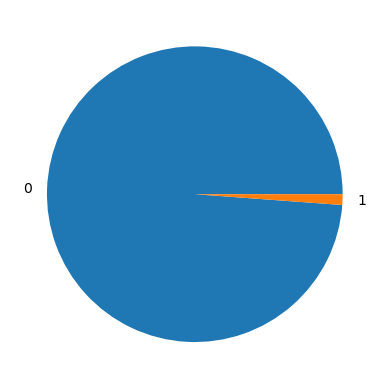

In [7]:
plt.pie(class_count, labels=class_type)
plt.show()

## Step 1: Creating a balanced Dataset

Since our dataset contains very little entities of class B, thus we would use oversampling and create 756 samples of class B by repeating those 9 samples 84 times. For this, I shall use the concat function to merge 84 times the data of class 1 and one times the data of class 0. 

In [8]:
df = pd.concat([data[data.Class == 1]]*84, ignore_index=True)
df = pd.concat([df, data[data.Class == 0]])

In [9]:
df.shape

(1519, 31)

In [10]:
class_type, class_count = np.unique(df.Class, return_counts=True)
class_count

array([763, 756])

Now, our dataset is more balanced, with fraudalent cases having 756 entries and non-fraudulent credit card entries having 763 entries.

## Step 2: Sampling

For all sample size calculations, I will assume the confidence level to be 95% and margin of error to be 5%. Thus my E = 0.05 and my Z = 1.96

### Simple Random Sampling Without Replacement

n = (Z^2 x P x (1-P))/(E^2)

where, Z = 1.96, P = 763/1519 and E = 0.05.

Plugging in the values, we get: n = 384.151 ~ 384

In [17]:
sample1 = df.sample(n=384)

### Simple Random Sampling With Replacement

n = (Z^2 x P x (1-P))/(E^2)

where, Z = 1.96, P = 763/1519 and E = 0.05.

Plugging in the values, we get: n = 384.151 ~ 384

In [16]:
sample2 = df.sample(n=384, replace=True)

### Stratified Sampling

n = (Z^2 x P x (1-P))/(E/S)^2

where, Z = 1.96, P = 763/1519, E = 0.05 and S =2.

Plugging in the values, we get: n = 1536.607 ~ 1536

In [19]:
sample3 = df[df.Class == 0].sample(n=768, replace=True)
sample3 = pd.concat([sample3,df[df.Class == 1].sample(n=768, replace=True)])

### Systematic Sampling

n = (Z^2 x P x (1-P))/(E^2)

where, Z = 1.96, P = 763/1519 and E = 0.05.

Plugging in the values, we get: n = 384.151 ~ 384

So, we can sample every 1591/384 row

In [24]:
temp = df.iloc[::3,]
sample4 = temp.sample(n=384)

### Cluster Sampling

n = (Z^2 x P x (1-P))/((E/C)^2)

where, Z = m1.96, P = 763/1519, E = 0.05 and C = 2.

Plugging in the values, we get: n = 1536.607 ~ 1536

In [30]:
cluster1 = df.iloc[0:759,:]
cluster2 = df.iloc[759:,:]
sample5 = pd.concat([cluster1.sample(n=768, replace=True), cluster2.sample(n=768, replace=True)])

## Step 3: Applying ML Models on the Samples

In [34]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split

In [33]:
lr = LogisticRegression()
dtc = DecisionTreeClassifier()
rfc = RandomForestClassifier()
svc = SVC()
knn = KNeighborsClassifier()

In [46]:
def apply_model_on_sample(sample):
    accuracy = []
    
    x_train, x_test, y_train, y_test = train_test_split(sample.iloc[:,:30], sample.iloc[:,30])
    
    lr = LogisticRegression(max_iter=1000)
    dtc = DecisionTreeClassifier()
    rfc = RandomForestClassifier()
    svc = SVC()
    knn = KNeighborsClassifier()
    
    lr.fit(x_train, y_train)
    dtc.fit(x_train, y_train)
    rfc.fit(x_train, y_train)
    svc.fit(x_train, y_train)
    knn.fit(x_train, y_train)
    
    accuracy.append(lr.score(x_test, y_test))
    accuracy.append(dtc.score(x_test, y_test))
    accuracy.append(rfc.score(x_test, y_test))
    accuracy.append(svc.score(x_test, y_test))
    accuracy.append(knn.score(x_test, y_test))
    
    return accuracy

In [47]:
samples = [sample1, sample2, sample3, sample4, sample5]

accuracy = []
for sample in samples:
    accuracy.append(apply_model_on_sample(sample))

/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/home/movy/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regressi

In [48]:
accuracy

[[0.9479166666666666, 0.96875, 1.0, 0.78125, 0.90625],
 [0.8541666666666666, 0.9791666666666666, 1.0, 0.71875, 0.9375],
 [0.9270833333333334, 1.0, 1.0, 0.734375, 0.9895833333333334],
 [1.0, 0.96875, 1.0, 0.84375, 0.9895833333333334],
 [0.9348958333333334, 0.9921875, 1.0, 0.7005208333333334, 0.9869791666666666]]